In [25]:
import tensorflow as tf
from tensorflow.keras import layers ,models
import matplotlib.pyplot as plt

In [26]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [27]:
# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [28]:
# reshape the data iclude the channel
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [29]:
# build the cnn model
model = models.Sequential([ layers.Conv2D(32,(3,3),activation='relu',input_shape = (28,28,1)),
                            layers.MaxPooling2D((2,2)),
                            layers.Conv2D(64,(3,3),activation='relu'),
                            layers.MaxPooling2D((2,2)),
                            layers.Flatten(),
                            layers.Dense(64,activation='relu'),
                            layers.Dense(10,activation='softmax')])

#compile the model


model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [30]:
# Testing

model.fit(x_train,y_train, epochs = 5,validation_data=(x_test,y_test))
test_loss,test_acc = model.evaluate(x_test,y_test)

print(f'Test accuracy : {test_acc: .4f}')

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.8895 - loss: 0.3619 - val_accuracy: 0.9844 - val_loss: 0.0469
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9851 - loss: 0.0492 - val_accuracy: 0.9879 - val_loss: 0.0350
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9901 - loss: 0.0316 - val_accuracy: 0.9871 - val_loss: 0.0360
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9924 - loss: 0.0228 - val_accuracy: 0.9890 - val_loss: 0.0349
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9943 - loss: 0.0175 - val_accuracy: 0.9873 - val_loss: 0.0399
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9836 - loss: 0.0463
Test accuracy :  0.9873


In [31]:
# Loading an image
from PIL import Image
import pandas as pd
import numpy as np

In [32]:
# Converts it to grayscale ('L' mode) with pixel values from 0-255
img = Image.open('four.jpg').convert('L')
img = img.resize((28,28))
img_array = np.array(img)
img_array = img_array - 255

img_array = img_array/255
input_data = img_array.reshape(1,28,28,1)
pred = model.predict(input_data)

np.argmax(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


np.int64(4)

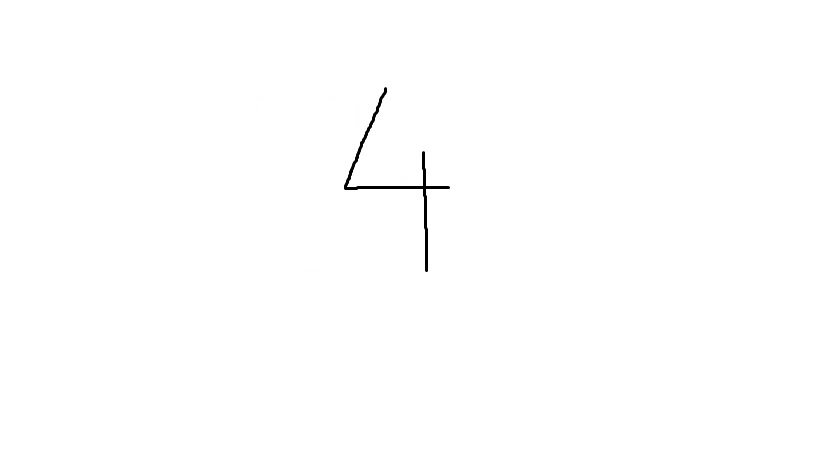

In [33]:
img =  Image.open('four.jpg').convert('L')
img